[과제함](https://cafe.naver.com/esaa2019?iframe_url_utf8=%2FArticleRead.nhn%253Fclubid%3D29858915%2526page%3D1%2526menuid%3D90%2526boardtype%3DL%2526articleid%3D2681%2526referrerAllArticles%3Dfalse)

기한: 3월 15일 (금) 18:30
​

과제: 핸즈온 4장 모델 훈련 p.157-202 필사하여 깃허브에 업로드한 뒤, 깃허브 링크를 댓글로 달아주세요.


In [1]:
# 그래프 설정
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# 4.1 선형 회귀

## 4.1.1 정규 방정식

In [27]:
import numpy as np

np.random.seed(42)  # 코드 예제를 재현 가능하게 만들기 위해
m = 100  # 샘플 개수
X = 2 * np.random.rand(m, 1)  # 열 벡터
y = 4 + 3 * X + np.random.randn(m, 1)  # 열 벡터

In [28]:
# from sklearn.preprocessing import add_dummy_feature
# X_b = add_dummy_feature(X)
X_b = np.c_[np.ones((m, 1)), X] # 각 샘플에 x0 = 1을 추가합니다.
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [29]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [30]:
X_new = np.array([[0], [2]])
# X_new_b = add_dummy_feature(X_new)  # 각 샘플에 x0 = 1을 추가합니다.
X_new_b = np.c_[np.ones((2, 1)), X_new]
# y_predict = X_new_b @ theta_best
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

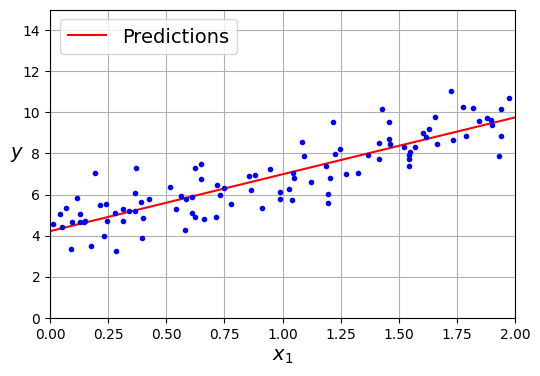

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))  # 추가 코드
plt.plot(X_new, y_predict, "r-", label="Predictions")
plt.plot(X, y, "b.")

# 추가 코드 - 그림 4-2를 꾸미고 저장합니다.
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc="upper left")

plt.show()

In [32]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [33]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

`LinearRegression` 클래스는 `scipy.linalg.lstsq()` 함수("least squares"의 약자)를 사용하므로 이 함수를 직접 사용할 수 있습니다:

In [34]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

이 함수는 $\mathbf{X}^+\mathbf{y}$을 계산합니다. $\mathbf{X}^{+}$는 $\mathbf{X}$의 _유사역행렬_ (pseudoinverse)입니다(Moore–Penrose 유사역행렬입니다). `np.linalg.pinv()`을 사용해서 유사역행렬을 직접 계산할 수 있습니다:

In [35]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

## 4.1.2 계산 복잡도

# 4.2 경사 하강법

## 4.2.1 배치 경사 하강법

In [36]:
eta = 0.1  # 학습률
n_epochs = 1000
m = len(X_b)  # 샘플 개수

np.random.seed(42)
theta = np.random.randn(2, 1)  # 모델 파라미터를 랜덤하게 초기화합니다

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

학습된 모델 파라미터:

In [37]:
theta

array([[4.21509616],
       [2.77011339]])

## 4.2.2 확률적 경사 하강법

In [38]:
n_epochs = 50
t0, t1 = 5, 50  # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)  # 랜덤 초기화


for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)  # SGD의 경우 m으로 나누지 않습니다
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

theta

array([[4.21076011],
       [2.74856079]])

In [39]:
theta

array([[4.21076011],
       [2.74856079]])

In [40]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1) #최대 100번의 에포크 동안. 한 에포크에서 0.001 보다 적게 손실이 줄어들 때까지. 학습률 0.1
sgd_reg.fit(X,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [41]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.19984658]), array([2.73198364]))

## 4.2.3 미니배치 경사 하강법

# 4.3 다항 회귀

In [54]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [55]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [56]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [57]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

# 4.4 학습 곡선

In [58]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='훈련 세트')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='검증 세트')

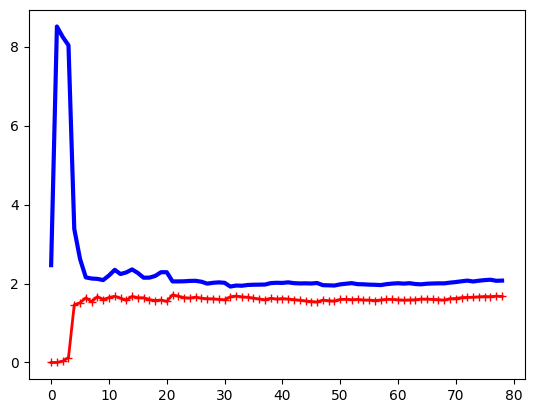

In [59]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
#blue: 검증 세트
#red:훈련세트

(0.0, 3.0)

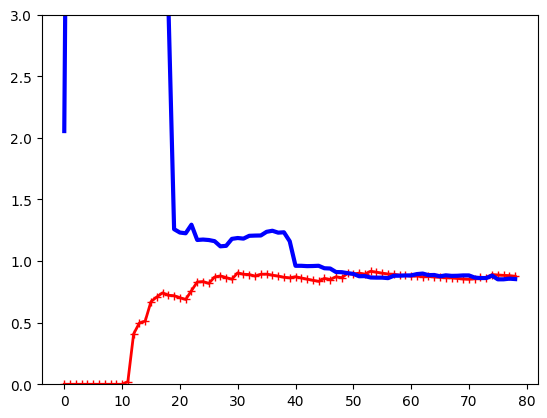

In [60]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
  ])
plot_learning_curves(polynomial_regression, X, y)
plt.ylim(0, 3.0)

# 4.5 규제가 있는 선형 모델

## 4.5.1 릿지 회귀

매우 작고 잡음이 많은 선형 데이터셋을 생성해 보겠습니다:

In [61]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82497007]])

In [62]:
sgd_reg = SGDRegressor(penalty="l2",
                       random_state=42)
sgd_reg.fit(X, y.ravel())  # fit()은 1D 타겟을 기대하므로 y.ravel()을 사용합니다.
sgd_reg.predict([[1.5]])

array([4.81978491])

In [51]:
# 추가 코드 - 확률적 평균 GD(solver="sag")를 사용하면
# 이전과 거의 동일한 솔루션을 얻을 수 있음을 보여줍니다.
ridge_reg = Ridge(alpha=0.1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[4.82673423]])

## 4.5.2 라쏘 회귀

Lasso 대신 SGDRegressor(penalty="l1") 사용가능

In [63]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

## 4.5.3 엘라스틱넷

In [64]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

## 4.5.4 조기 종료

앞서 사용한 2차방정식 데이터셋을 다시 사용합니다:

```
오류)
p.192
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
수정)
sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)
```
```
추가 코드 p.192
X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)
```
```
오류)
p.193
sgd_reg.fit(X_train_poly_scaled,y_train)
수정)
sgd_reg.fit(X_train_poly_scaled,y_train.ravel())
```

In [65]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2)

# 데이터 준비
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=None, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)


# 4.6 로지스틱 회귀

## 4.6.1 확률 추정

## 4.6.2 훈련과 비용 함수

## 4.6.3 결정 경계

```
오류)
p.197
y=(iris["target"]==2).astype(np.int)
수정)
y=(iris["target"]==2).astype(int)
```



In [66]:
from sklearn.datasets import load_iris

iris = load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [67]:
X = iris["data"][:, 3:]
y = (iris["target"]==2).astype(int)

In [68]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

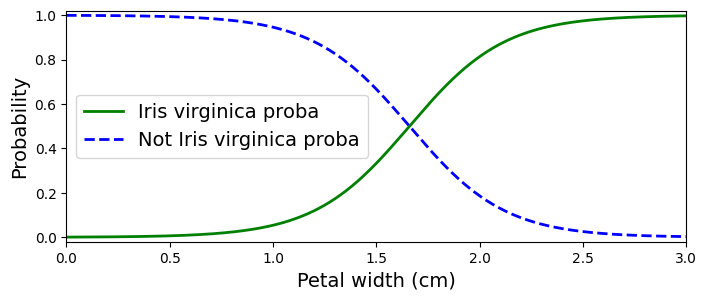

In [69]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # 크기를 바꾸어 열 벡터를 얻습니다.
y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(8, 3))
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2,
         label="Iris virginica proba")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")

plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [70]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])

## 4.6.4 소프트맥스 회귀

In [71]:
X = iris.data[:, (2,3)] # 꽃잎 길이, 꽃잎 너비
y = iris["target"]
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

softmax_reg = LogisticRegression(multi_class="multinomial",
                                 solver="lbfgs",
                                 C=10,
                                 random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, multi_class='multinomial', random_state=42)

In [72]:
softmax_reg.predict([[5, 2]])

array([2])

In [73]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.06, 0.94]])